<a href="https://colab.research.google.com/github/elnaggar96/ahmed-elnagar/blob/main/NLP_Projet_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My AI diploma Final Project**
This project is about training an RNN model using LSTM technique to predict if a tweet is really linked to a disaster or not.

**Importing Libraries**

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

#libraries for NLP
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from tqdm import tqdm
from IPython.display import HTML
!pip install chart_studio
import plotly
import plotly.subplots
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px
from collections import defaultdict
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Conv1D, Bidirectional, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 import our disaster tweet dataset

In [4]:
data = pd.read_csv("/content/drive/MyDrive/final project/Predicting Disaster Tweets/train.csv")
Testdata =pd.read_csv('/content/drive/MyDrive/final project/Predicting Disaster Tweets/test.csv')

Check head and info of the data


In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
data.shape

(7613, 5)

In [8]:
#Count of duplicate values 
data.duplicated().sum()

0

In [9]:
data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


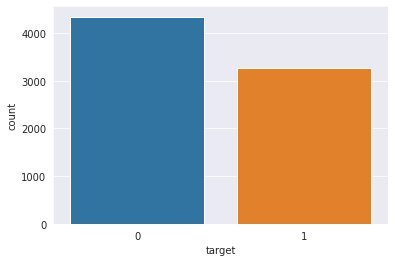

In [10]:
sns.countplot(data["target"])

In [11]:
data["target"].value_counts(normalize = True) #normalized value counts

0    0.57034
1    0.42966
Name: target, dtype: float64

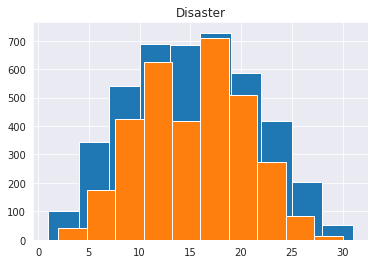

In [12]:
def length_plot(data, name):
  length = [len(sentence.split()) for sentence in data]
  plt.hist(length)
  plt.title(name)
length_plot(data[data["target"]==0]["text"], "Not Disaster")
length_plot(data[data["target"]==1]["text"], "Disaster")

Missing data
AND Data in each class

In [13]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [14]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
percent_missing
missing_value_df

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

,column_name,percent_missing
id,id,0.000000
keyword,keyword,0.801261
location,location,33.272035
text,text,0.000000
target,target,0.000000


 separate the dependent and independent features

In [15]:
X = data["text"] # indpendent feature
y = data["target"] # dependent feature
y = np.array(y) # converting to array

Calculating the number of unique words present in the disaster tweets

In [16]:
def unq_words(sentence):
  unq_words_list = []
  for sent in tqdm(sentence):
    for word in sent.split():
      if word.lower() not in unq_words_list:
        unq_words_list.append(word.lower())
      else:
        pass
  return unq_words_list
unique_words = unq_words(X)
print("Total unique words present :",len(unique_words))

100%|██████████| 7613/7613 [00:23<00:00, 317.67it/s]

Total unique words present : 27983


In [17]:
unique_words[:15]

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 '#earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all',
 'forest',
 'fire']

words starting with “#”

In [18]:
SYMBOL_1 = "#"
sym1_words = [word for word in unique_words if word.startswith(SYMBOL_1)]
len(sym1_words)

1965

words starting with “@”

In [19]:
SYMBOL_2 = "@"
sym2_words = [word for word in unique_words if word.startswith(SYMBOL_2)]
len(sym2_words)

2264

remove the  urls present

In [20]:
def url_remover(text):
    url_patterns = re.compile(r'https?://S+|www.S+')
    return url_patterns.sub(r'', text)

In [21]:
# Tokenization of paragraphs/sentences
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

Top 15 locations of the data

In [22]:
data["location"].nunique()

3341

In [23]:
data.location.value_counts()[:15].to_frame()

,location
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24
Mumbai,22


Text(0.5, 1.0, 'Top 15 locations')

Text(0.5, 0, 'Count of locations')

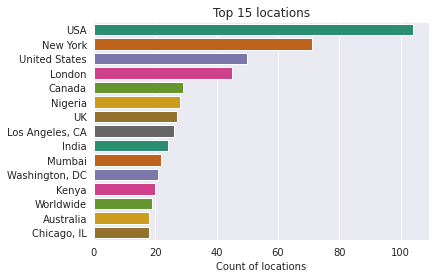

In [24]:
word_plot=data['location'].value_counts()[:15]
sns.barplot(x=word_plot,y=word_plot.index,palette='Dark2')
plt.title("Top 15 locations")
plt.xlabel("Count of locations")

Top 15 keyword in the data

In [25]:
data["keyword"].nunique()

221

In [26]:
data.keyword.value_counts()[:15].to_frame()


,keyword
fatalities,45
deluge,42
armageddon,42
sinking,41
damage,41
harm,41
body%20bags,41
outbreak,40
evacuate,40
fear,40


Text(0.5, 1.0, 'Top 15 Keywords')

Text(0.5, 0, 'Count of Keywords')

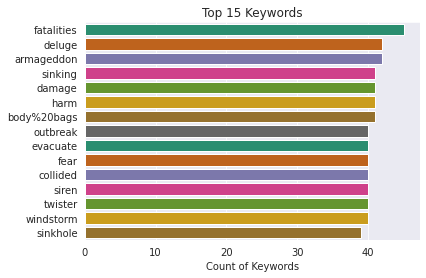

In [27]:
word_plot=data['keyword'].value_counts()[:15]
sns.barplot(x=word_plot,y=word_plot.index,palette='Dark2')
plt.title("Top 15 Keywords")
plt.xlabel("Count of Keywords")

Unique Words

In [28]:
X = data["text"] # indpendent feature
def uniq_words(sentence):
  uniq_words_list = []
  for sent in tqdm(sentence):
    for word in sent.split():
      if word.lower() not in uniq_words_list:
        uniq_words_list.append(word.lower())
      else:
        pass
  return uniq_words_list
unique_words = uniq_words(X)
print("Total unique words present :",len(unique_words))


100%|██████████| 7613/7613 [00:12<00:00, 620.71it/s]

Total unique words present : 27983


In [29]:
unique_words[:15]

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 '#earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all',
 'forest',
 'fire']

removed un necessary symbols stopwords

In [30]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
def preprocessing(text):
  tweets = []
  for sentence in tqdm(text):
    sentence = sentence.lower() # converting the words to lower case
    sentence =  url_remover(sentence) # removing the url from the sentence
    sentence = re.sub(r'@w+',  '', sentence).strip() # removing the words starts with "@"
    sentence = re.sub("[^a-zA-Z0-9 ']", "", sentence) # removing symbols
    sentence = sentence.split()
    sentence1 = [wl.lemmatize(word) for word in sentence if word not in set(stopwords.words("english"))] #lemmatization and stopwrds removal from tweets
    sentence1 = " ".join(sentence1)
    tweets.append(sentence1)
  return tweets
tweets = preprocessing(X)

100%|██████████| 7613/7613 [00:16<00:00, 453.51it/s]


In [31]:
from tensorflow.keras.layers import (Embedding,
                                     LSTM,
                                     Dense,
                                     Dropout,
                                     GlobalMaxPool1D,
                                     BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

performing onehot encoding

In [32]:
VOC_SIZE = 30000
onehot_vector= [one_hot(words, VOC_SIZE) for words in tweets]
onehot_vector[110:120]

[[29088, 23055, 19141, 5741, 2220, 14949, 12295],
 [8083, 7283, 22191, 29043, 2331, 10847, 2179],
 [10847, 23333, 10625, 7742, 19850, 13330, 11677, 1966, 13330],
 [10847, 5228],
 [4681,
  653,
  6754,
  10847,
  5880,
  11116,
  21679,
  5780,
  27739,
  23829,
  14337,
  29937,
  8110],
 [4681,
  653,
  6754,
  10847,
  28825,
  11116,
  21679,
  5780,
  27739,
  23829,
  14337,
  29937,
  18020],
 [4681,
  653,
  6754,
  10847,
  27038,
  11116,
  21679,
  5780,
  27739,
  23829,
  14337,
  29937,
  20874],
 [9964, 22740, 14180, 28726, 10847],
 [4681,
  653,
  6754,
  10847,
  25497,
  11116,
  21679,
  5780,
  27739,
  23829,
  14337,
  29937,
  1694],
 [4681,
  653,
  6754,
  10847,
  25497,
  11116,
  21679,
  5780,
  27739,
  23829,
  14337,
  29937,
  1694]]

the word length each for each tweets.

In [33]:
word_length = []
for i in onehot_vector:
  word_length.append(len(i))

In [34]:
len(word_length)

7613

 maximum word length

In [35]:
max(word_length)

25

 make equal length sequences.

In [36]:
SENTENCE_LENGTH = 15
embedded_docs = pad_sequences(onehot_vector, padding="post", maxlen=SENTENCE_LENGTH)
embedded_docs

array([[12893, 21905, 25092, ...,     0,     0,     0],
       [ 2998,  1950, 17046, ...,     0,     0,     0],
       [ 6707, 19666, 17168, ...,     0,     0,     0],
       ...,
       [24622,  2141, 22337, ...,     0,     0,     0],
       [ 6687, 20483, 23913, ..., 25815, 28619,     0],
       [23229, 15607, 14455, ...,     0,     0,     0]], dtype=int32)

model creation step. The first layer is a word embedding layer followed LSTM model

In [37]:
def model():
  VECTOR_FEATURES = 32
  lstm_model = Sequential()
  lstm_model.add(Embedding(VOC_SIZE,
                      VECTOR_FEATURES,
                      input_length=SENTENCE_LENGTH))
  lstm_model.add(LSTM(100, return_sequences = True))
  lstm_model.add(GlobalMaxPool1D())
  lstm_model.add(BatchNormalization())
  lstm_model.add(Dropout(0.5))
  lstm_model.add(Dense(10, activation="relu"))
  lstm_model.add(Dropout(0.25))
  lstm_model.add(Dense(1, activation = "sigmoid"))
  return lstm_model

Creating the model and getting the model summary

In [38]:
lstm_model = model()
lstm_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 32)            960000    
                                                                 
 lstm (LSTM)                 (None, 15, 100)           53200     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

Training the model

In [39]:
history = lstm_model.fit(embedded_docs, y, epochs=8, batch_size=32)

Epoch 1/8
238/238 [==============================] - 9s 26ms/step - loss: 0.5856 - accuracy: 0.6926
Epoch 2/8
238/238 [==============================] - 6s 25ms/step - loss: 0.3842 - accuracy: 0.8496
Epoch 3/8
238/238 [==============================] - 6s 26ms/step - loss: 0.2536 - accuracy: 0.9149
Epoch 4/8
238/238 [==============================] - 9s 37ms/step - loss: 0.1974 - accuracy: 0.9435
Epoch 5/8
238/238 [==============================] - 6s 26ms/step - loss: 0.1545 - accuracy: 0.9605
Epoch 6/8
238/238 [==============================] - 6s 26ms/step - loss: 0.1281 - accuracy: 0.9676
Epoch 7/8
238/238 [==============================] - 6s 26ms/step - loss: 0.1077 - accuracy: 0.9770
Epoch 8/8
238/238 [==============================] - 6s 26ms/step - loss: 0.1030 - accuracy: 0.9768


analyze our model by plotting the graph of model accuracy and loss

**for accuracy**

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy')

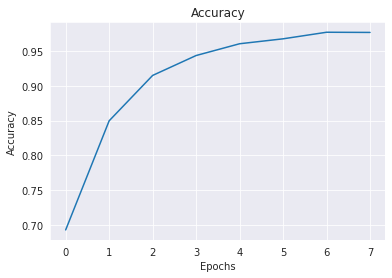

In [40]:
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")

for loss

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Loss')

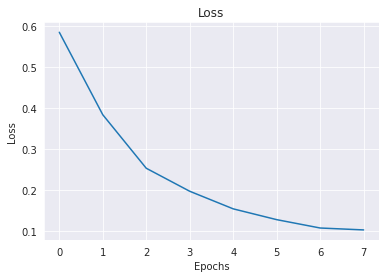

In [41]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")

From the graph of Loss and Accuracy it is clear that, as the epochs proceeds loss reduces and accuracy increases more than 97%.

# **Conclusion**

Text analysis : Analyzing the text to find the sentence structure, symbols used in there, and length of sentences etc.

Text preprocessing: Analyzed text data is then subjected to done some preprocessing techniques like stopwords removal, lemmatization, symbols remover

Model creation: created the LSTM model and passed the data through it after onehot encoding and wordembedding.

# **Reference**

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

https://nlp.stanford.edu/projects/glove/

https://www.analyticsvidhya.com/blog/2022/05/disaster-tweet-classification-using-lstm-nlp/

https://github.com/HadeerMAli/NLP-Final-Project-Predicting-disaster-tweets-/blob/main/Predicting_disaster_tweets.ipynb